# Visualization
<h2>Pandas built-in visualization is built on top of matplotlib so its possible to fine tune the plots (ticks, labels etc...) using matplotlib</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
# We can use matplotlib built in stypes like ggplot, to make plots look nicer. Also importing seaborn library has a good effect

In [4]:
students = pd.read_csv('students.csv')
students.head()

,student_id,gender,grade,math,science,english
0,student1,Male,4,77,77,75
1,student2,Female,6,87,84,78
2,student3,Female,4,86,75,68
3,student4,Male,4,69,69,74
4,student5,Female,5,73,69,70


In [4]:
''' HISTOGRAM '''

' HISTOGRAM '

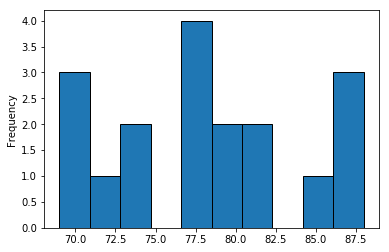

In [3]:
students['math'].plot.hist(lw=1, edgecolor ='k')

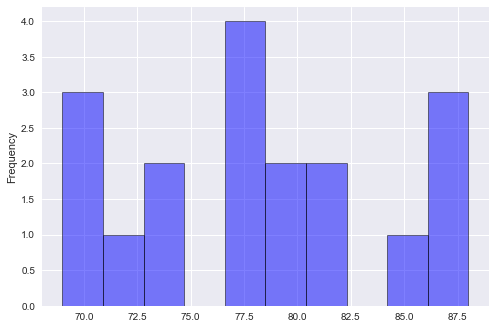

In [8]:
import seaborn as sns
students['math'].plot.hist(lw =1, edgecolor='k', color='b', alpha=0.5)

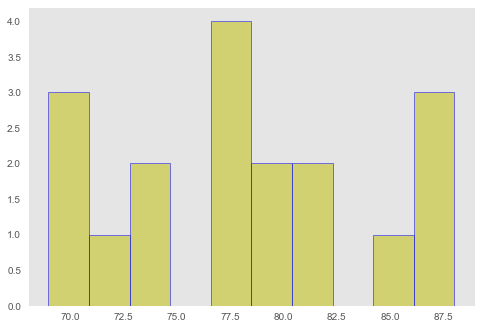

In [5]:

pp.style.use('ggplot')
students['math'].hist(lw=1, grid=False, color='y', edgecolor='b', alpha=0.5 )

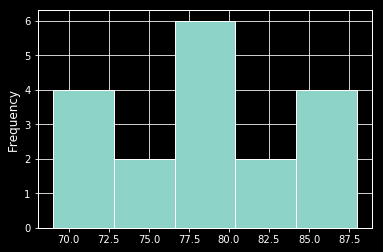

In [23]:
pp.style.use('dark_background')
students['math'].plot.hist(bins=5, lw=1, edgecolor='w')

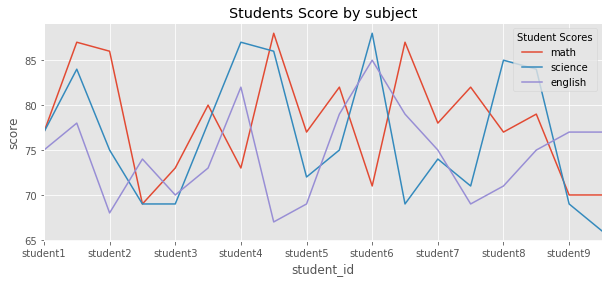

In [13]:
'''Line Plots'''
pp.style.use('ggplot')
line = students[['math', 'science', 'english']].plot.line(figsize =(10,4))
line.set_xlabel(students.columns[0])
line.set_ylabel('score')
line.set_xticklabels(students['student_id'])
line.legend().set_title('Student Scores')
line.set_title('Students Score by subject')

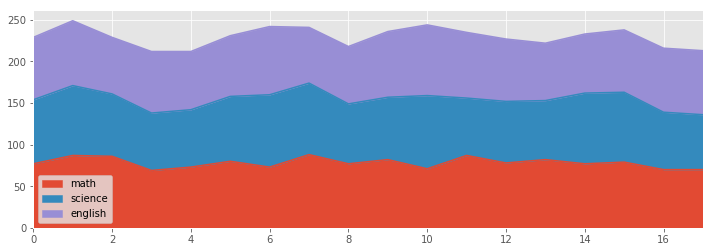

In [15]:
'''Area'''
students[['math','science', 'english']].plot.area()

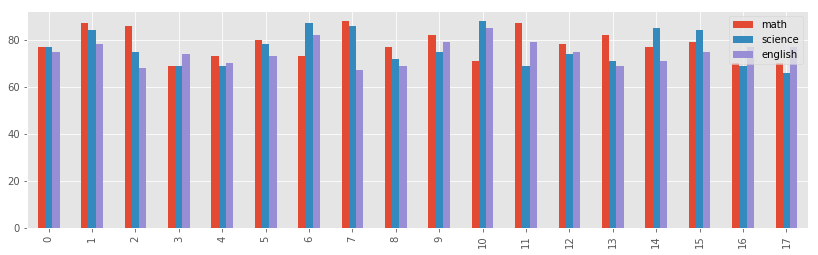

In [17]:
'''Bar'''
students[['math','science','english']].plot.bar(figsize=(14,4))

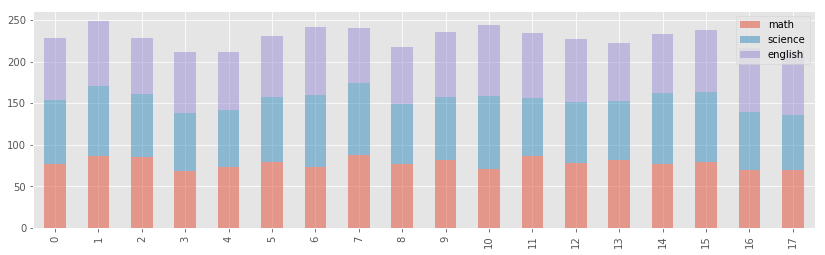

In [19]:
students[['math','science','english']].plot.bar(figsize=(14,4), stacked=True, alpha=0.5)

In [9]:
'''Scatter'''
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


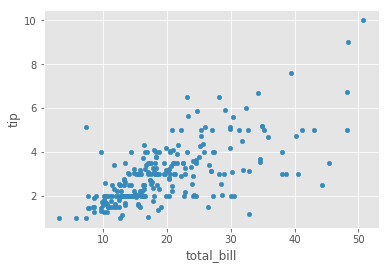

In [22]:
tips.plot.scatter(x='total_bill', y='tip')

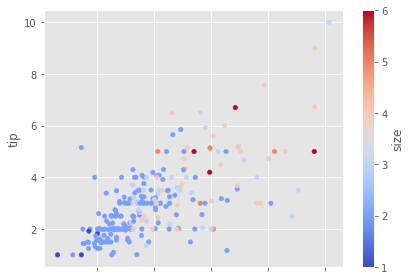

In [61]:
# group points according to values in certain column and specify a color map to differenciate the values. 
#NOTE the c= '' requires a numeric column
tips.plot.scatter(x='total_bill', y='tip', c='size', cmap='coolwarm')
pp.tight_layout()

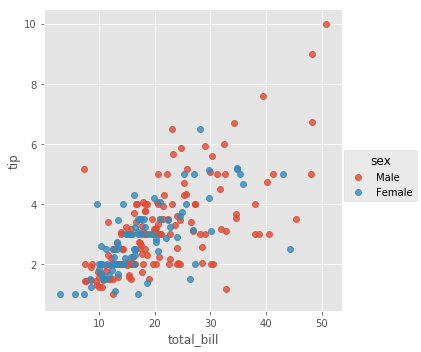

In [34]:
#for non numeric column we can use seaborn
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex',fit_reg=False)

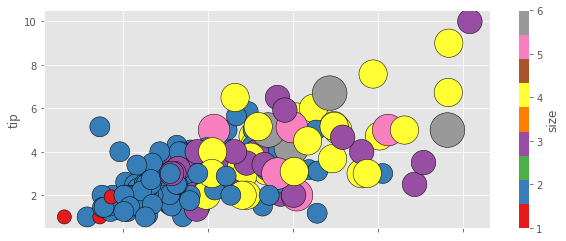

In [40]:
# group points according to values in certain column and specify a size  to differenciate the values. 
# NOTE: The s='' requires teh actual Series object instead of column name like for x,y, c
tips.plot.scatter(x='total_bill', y= 'tip', s=tips['size'] * 200, edgecolor='k', c='size', cmap='Set1', figsize=(10,4))

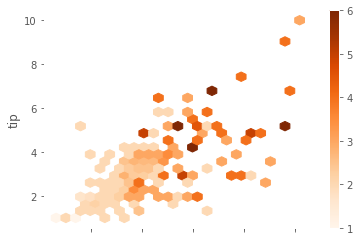

In [64]:
'''Hex plot - Alternative to scatter plot'''
tips.plot.hexbin(x='total_bill', y='tip', C='size', gridsize=25, cmap='Oranges')
pp.gca().set_facecolor('w')

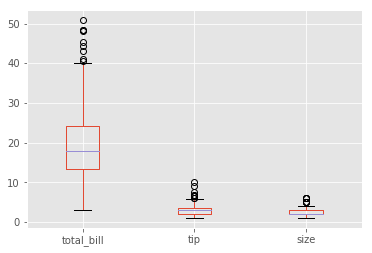

In [46]:
''' Box Plot'''
# used to show distribution and quartiles as well as outliers
tips.plot.box()

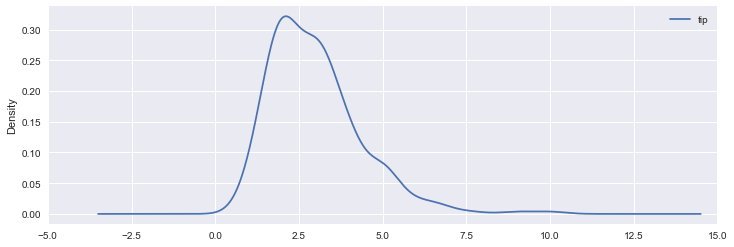

In [13]:
'''density'''
tips['tip'].plot.density(figsize=(12,4), xlim=(-5,15), legend=True) # or plot.kde()

In [10]:
'''PIE Chart'''
total_tip_by_sex = tips.groupby('sex').sum()
total_tip_by_sex


,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


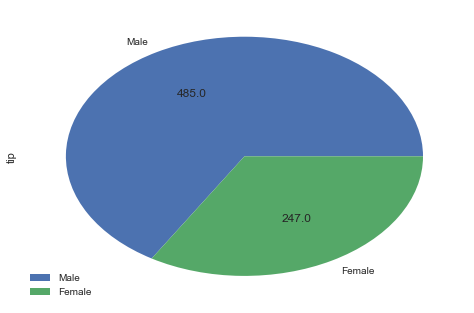

In [11]:
# by default the autopct will display percentage. to show actually values convert it back to the values 
total_tip_by_sex.plot.pie(y='tip', labels=total_tip_by_sex.index, 
                          autopct=lambda x: np.round( x/100.* total_tip_by_sex['tip'].sum(), 0))